In [36]:
from src.estimators.semiparametric.nm_semiparametric_estimator import NMSemiParametricEstimator
from src.generators.nm_generator import NMGenerator
from src.mixtures.nm_mixture import NormalMeanMixtures
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [37]:
n_samples = 10000
sigma_0 = 2
mixing_dist = gamma(9, scale=1.0)

In [38]:
def generate_nmm_sample(sigma_0, sample_len, mixing_dist):
    generator = NMGenerator()
    mixture = NormalMeanMixtures("canonical", sigma=sigma_0, distribution=mixing_dist)
    sample = generator.canonical_generate(mixture, sample_len)
    return sample

In [39]:
sample = generate_nmm_sample(sigma_0, n_samples, mixing_dist)
x = np.linspace(0, 20, 1000)
estimator = NMSemiParametricEstimator(
            "g_estimation_convolution", {"x_data": x, "sigma": sigma_0, "bohman_n": 10000, "bohman_delta": 0.0001}
        )
result = estimator.estimate(sample)


(0.0, 0.14681763772377276)

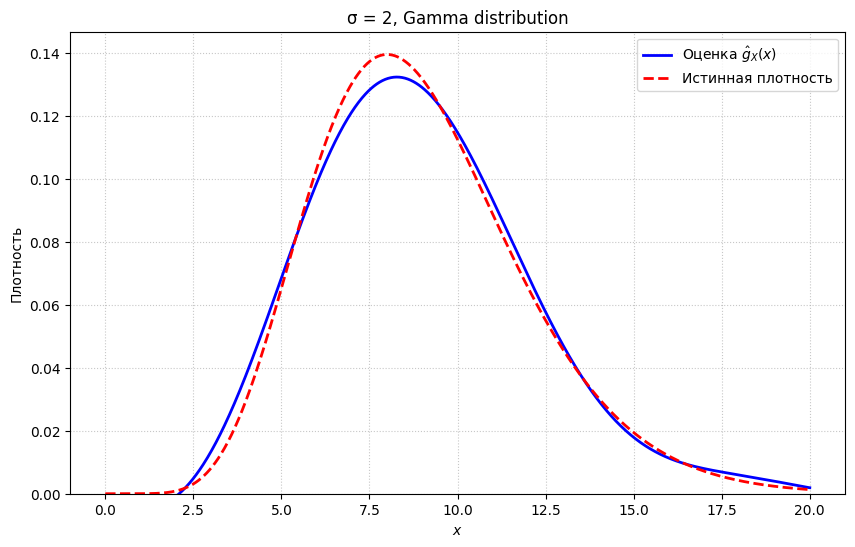

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x, result.list_value, label=f'Оценка $\hat{{g}}_X(x)$', color='blue', linewidth=2)
plt.plot(x, mixing_dist.pdf(x), label=f'Истинная плотность', color='red', linestyle='--', linewidth=2)
plt.title(f"σ = 2, Gamma distribution")
plt.xlabel('$x$')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(bottom=0)